<a href="https://colab.research.google.com/github/Shivangi12974/HOUSE-PRICE-PREDICTION-/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# set random seed for reproducibility
np.random.seed(32)

# Generate synthetic data (1000 sample)

size  = np.random.randint(500,5000,1000)
bedrooms = np.random.randint(1,6,1000)
location = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)

# Generate House prices with some noise
price = (size * 300) + (bedrooms * 50000) + (location * 20000) - (age * 2000) + np.random.randint(-20000,20000,1000)

# Create Dataframe
df = pd.DataFrame({"size:" :size,"Bedrooms" : bedrooms,"location" :location,"Age" :age,"price":price})

#save to csv
csv_filename = "house_price_data.csv"
df.to_csv(csv_filename, index = False)
print(f" Dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

 Dataset saved as 'house_price_data.csv' with 1000 rows and 5 columns.


In [3]:
import pandas as pd
# Load dataset (make sure to update the path if needed)
df = pd.read_csv("house_price_data.csv")
# Display 1st 5 row
print(df.head())

   size:  Bedrooms  location  Age    price
0   3275         3         8   49  1199828
1   2079         3        10   33   901109
2   1834         5         2    3   825405
3   3440         1         7   25  1155181
4   4530         1         8   13  1523051


In [4]:
# check for missing values
print("\n Missing values:\n", df.isnull().sum())
# summary statistics
print("\n Dataset Summary:\n", df.describe())


 Missing values:
 size:       0
Bedrooms    0
location    0
Age         0
price       0
dtype: int64

 Dataset Summary:
              size:     Bedrooms     location          Age         price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2775.069000     2.956000     5.708000    25.106000  1.043853e+06
std    1329.921326     1.431822     2.875936    14.320819  4.137461e+05
min     500.000000     1.000000     1.000000     1.000000  1.328160e+05
25%    1632.000000     2.000000     3.000000    13.000000  6.985770e+05
50%    2772.500000     3.000000     6.000000    26.000000  1.054548e+06
75%    3926.500000     4.000000     8.000000    37.000000  1.403314e+06
max    4998.000000     5.000000    10.000000    50.000000  1.836620e+06


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

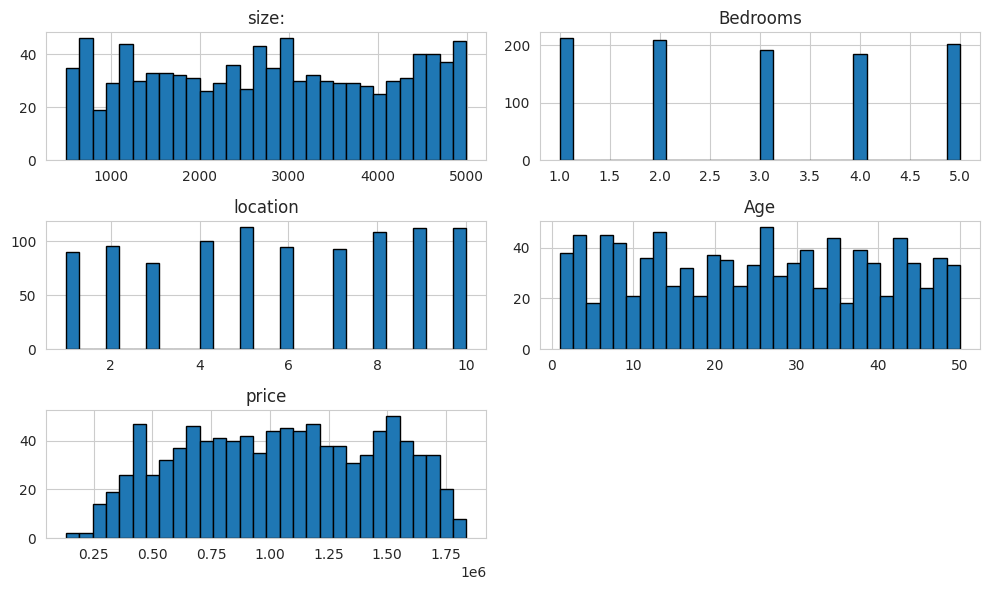

In [6]:
# set plot style
sns.set_style("whitegrid")

# plot feature distributions
df.hist(figsize=(10,6),bins=30,edgecolor="black")
plt.tight_layout()
plt.show()

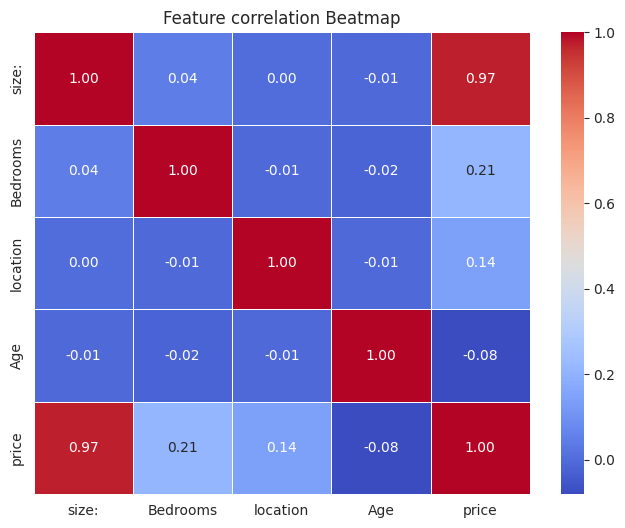

In [7]:
# coorelation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm", fmt =".2f", linewidths=0.5)
plt.title("Feature correlation Beatmap")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
#select features and target
x = df[["size:","Bedrooms","location","Age"]]
y = df["price"]
# Split data into training & testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Model Performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel performance:\nMAE:{mae:.2f},R2 score:{r2:.2f}")


Model performance:
MAE:9390.75,R2 score:1.00


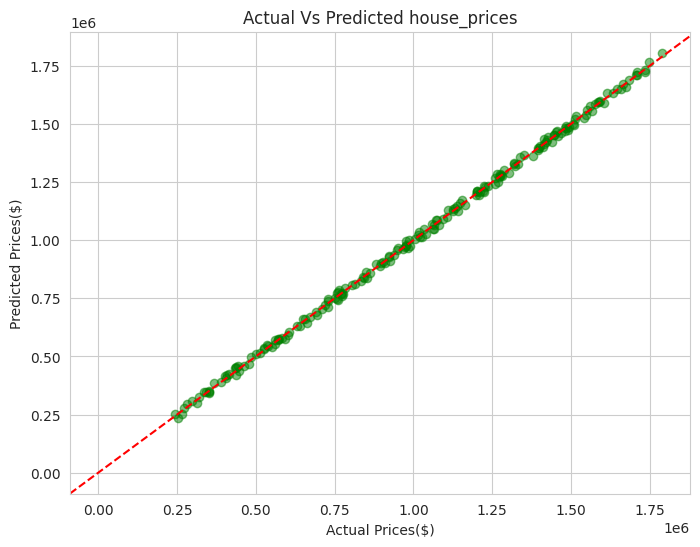

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color="green")
plt.xlabel("Actual Prices($)")
plt.ylabel("Predicted Prices($)")
plt.title("Actual Vs Predicted house_prices")
plt.axline([0,0],slope=1,color="red",linestyle="--") # model fit line
plt.show()